# Principal Component Analysis

Unsupervised learning algorithm, that is just a transformation of your data and attempts to find out what features explain the most variance in your data.

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

## The Data

Let's work with the cancer data set since it had so many features.

In [43]:
from sklearn.datasets import load_breast_cancer

In [44]:
cancer = load_breast_cancer()

In [45]:
type(cancer)

sklearn.utils.Bunch

In [46]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [47]:
#print(cancer['data'])

In [48]:
#print(cancer['feature_names'])

In [17]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [53]:
X = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
#(['DESCR', 'data', 'feature_names', 'target_names', 'target'])


In [54]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [56]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [57]:
X.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [58]:
X.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [59]:
y = cancer['target']
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

<AxesSubplot:>

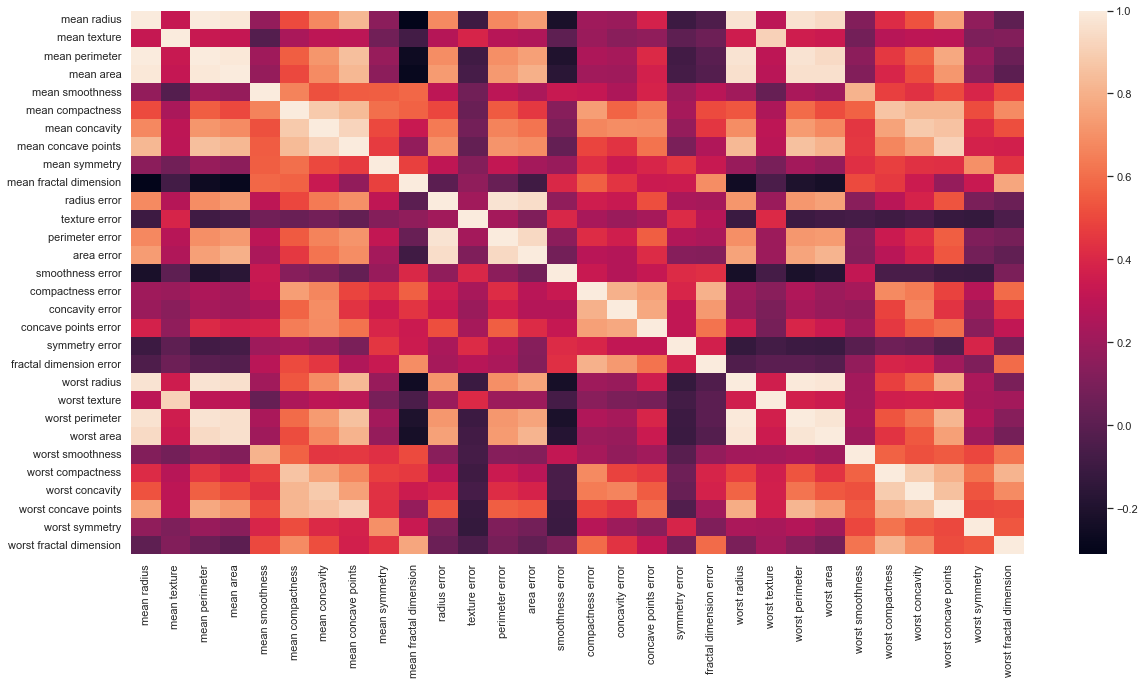

In [60]:
#### 4.2 Correlation heatmap of the numberic variables
plt.rcParams['figure.figsize'] = 20,10  # control plot sizeimport seaborn as sns
sns.heatmap(X.corr())

In [62]:
from sklearn.model_selection import train_test_split, cross_val_score
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [63]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the PCA object.

In [66]:
print(X_train,X_test)

[[-1.15036482 -0.39064196 -1.12855021 ... -0.75798367 -0.01614761
  -0.38503402]
 [-0.93798972  0.68051405 -0.94820146 ... -0.60687023  0.09669004
  -0.38615797]
 [ 0.574121   -1.03333557  0.51394098 ... -0.02371948 -0.20050207
  -0.75144254]
 ...
 [-1.32422924 -0.20048168 -1.31754581 ... -0.97974953 -0.71542314
  -0.11978123]
 [-1.24380987 -0.2245526  -1.28007609 ... -1.75401433 -1.58157125
  -1.00601779]
 [-0.73694129  1.14989702 -0.71226578 ... -0.27460457 -1.25895095
   0.21515662]] [[-0.20175604  0.3290786  -0.13086754 ...  1.3893291   1.08203284
   1.54029664]
 [-0.25555773  1.46763319 -0.31780437 ... -0.83369364 -0.73131577
  -0.87732522]
 [-0.02619262 -0.8407682  -0.09175081 ... -0.49483785 -1.22080864
  -0.92115937]
 ...
 [ 1.71811488  0.09318356  1.7286186  ...  1.57630515  0.20317063
  -0.15406178]
 [ 1.18859296  0.34352115  1.19333694 ...  0.56019755  0.26991966
  -0.27320074]
 [ 0.26263752 -0.58080224  0.28459338 ... -0.19383705 -1.15564888
   0.11231497]]


In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=2)

In [30]:
pca.fit(scaled_data)

PCA(n_components=2)

Now we can transform this data to its first 2 principal components.

In [31]:
x_pca = pca.transform(scaled_data)

In [32]:
scaled_data.shape

(569, 30)

In [33]:
x_pca.shape

(569, 2)

In [34]:
pca.n_components

2

In [35]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [36]:
pd.DataFrame(x_pca, columns = ['PCA1', 'PCA2']).head()

,PCA1,PCA2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


Great! We've reduced 30 dimensions to just 2! Let's plot these two dimensions out!

Text(0, 0.5, 'PCA2')

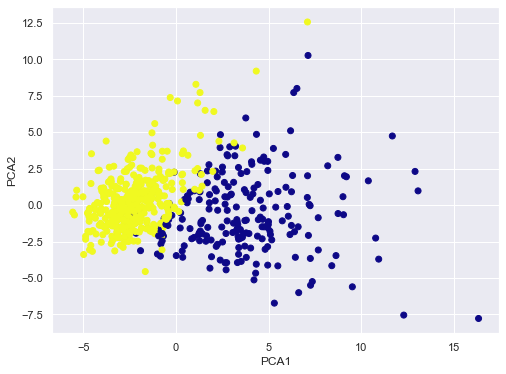

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

Clearly by using these two components we can easily separate these two classes.

## Interpreting the components 

Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In [38]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:

In [41]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

<AxesSubplot:>

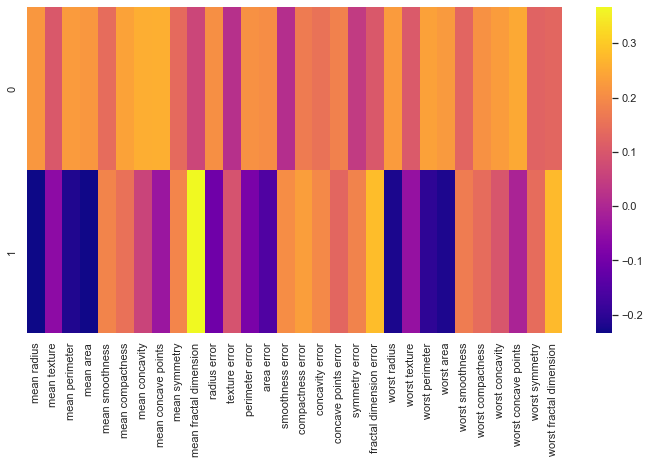

In [40]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.

## Conclusion

PCA has no concern with the class labels. It summarizes the feature set without considering the output. PCA tries to find the directions of the maximum variance in the dataset. In a high cardinality feature set, there are possibilities of duplicate features which would add redundancy to the dataset, increase the computation cost and add unneccessary model complexity. The role of PCA is to find such highly correlated or duplicate features and to come up with a new feature set where there is minimum correlation between the features or in other words feature set with maximum variance between the features.

### feature imporatant

In [ ]:
# Correlation with Target Variable

corr_matrix = au_copy.corr().abs()


plt.figure(figsize=(30,20))
au_copy.corr()['fraud_reported'].plot()

In [ ]:
from xgboost import XGBClassifier
from matplotlib import pyplot

plt.figure(figsize=(20,10))

# fit model no training data
model = XGBClassifier()
model.fit(training_features, training_target)

In [ ]:
# feature importance
#print(model.feature_importances_)

In [ ]:
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [ ]:
feature_importances = pd.DataFrame({'Importance Coef' :model.feature_importances_ , 'Features' : training_features.columns})
feature_importances.nlargest(135, 'Importance Coef')

In [ ]:
features = feature_importances.nlargest(135, 'Importance Coef')

In [ ]:
'''# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
array = Bchurn.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print ()"Num Features: %d" % fit.n_features_
print("Selected Features: %s") % fit.support_)
print("Feature Ranking: %s") % fit.ranking_

# Kpca

In [300]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
kpca.fit(X)

KernelPCA(kernel='rbf', n_components=2)

In [301]:
kpca = kpca.transform(X)

In [302]:
kpca

array([[-0.00290973, -0.00305362],
       [-0.00291059, -0.00305461],
       [-0.00290973, -0.00305362],
       ...,
       [-0.00290973, -0.00305362],
       [-0.00290973, -0.00305362],
       [-0.00290973, -0.00305363]])

In [303]:
pd.DataFrame(kpca, columns = ['principal component 1', 'principal component 2']).head()

,principal component 1,principal component 2
0,-0.002910,-0.003054
1,-0.002911,-0.003055
2,-0.002910,-0.003054
3,-0.002910,-0.003054
4,-0.002910,-0.003054


Text(0, 0.5, 'principal component 2')

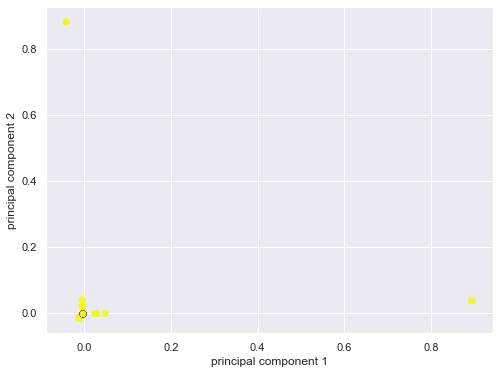

In [304]:
plt.figure(figsize=(8,6))
plt.scatter(kpca[:,0],kpca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')

In [305]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_lda= lda.fit_transform(X,y)


In [306]:
lda.explained_variance_ratio_

array([1.])

In [307]:
lda= pd.DataFrame(X_lda, columns=['LDA']).head()
lda

,LDA
0,3.323927
1,2.319108
2,3.747425
3,4.048549
4,2.281158


LDA tries to reduce the dimensionality by taking into consideration the information that discriminates the output classes. LDA tries to find the decision boundary around each cluster of class.

It projects the data points to new dimension in a way that the clusters are as seperate from each other as possible and individual elements within a class are as close to the centroid as possible.

